In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/africa-conflict-19972020/Africa_1997-2020_Jan08.csv


In [7]:
data = pd.read_csv("/kaggle/input/africa-conflict-19972020/Africa_1997-2020_Jan08.csv",sep=";")
data

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,404,KEN318,318,25-octobre-1998,1998,1,Violence against civilians,Attack,OLF: Oromo Liberation Front,Borana Ethnic Militia (Kenya),...,Township,Tuli,1643,40343,1,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28,1553544833
65531,404,KEN319,319,02-novembre-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),Students (Kenya),...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,University students protest over killing in Wa...,0,1567465412
65532,404,KEN320,320,10-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0,1604344065
65533,404,KEN323,323,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Rival SPLA factions battle at police station,0,1583194169


In [8]:
national_df = data[data['SOURCE_SCALE'] == 'National']
national_df

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
193,12,ALG194,194,23-avril-1999,1999,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Tizi Ouzou,36712,4046,3,La Tribune (Algeria),National,Formation of armed group: A meeting was held o...,0,1604354644
196,12,ALG197,197,12-juillet-1999,1999,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Lakhdaria,36565,3593,1,Liberte (Algeria),National,Reports that two GSPC militants killed one ano...,2,1579554014
197,12,ALG198,198,12-juillet-1999,1999,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Zemmouri,36785,3604,2,Liberte (Algeria),National,"In Boumerdes, the security forces killed a mil...",1,1579554013
198,12,ALG199,199,15-juillet-1999,1999,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Haizer,36424,4018,2,Le Matin (Algeria),National,"Emir Mezouane, commander of the Salafi Group f...",1,1561468958
203,12,ALG204,204,04-septembre-1999,1999,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Draa El Mizan,36535,3834,1,Liberte (Algeria),National,A group of militants responsible for the killi...,9,1579554014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65434,404,KEN221,221,01-juillet-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),NaN,...,Konyu,Karatina,-482,37125,1,Daily Nation (Kenya),National,Tea farmers protest for bonus payment.,0,1563305274
65436,404,KEN222,222,02-juillet-1998,1998,1,Battles,Armed clash,Pokot Ethnic Militia (Kenya),NaN,...,Kiwawa,Lopitit,2233,35017,1,Daily Nation (Kenya),National,Pokot battle Karamojong raiders. 84 killed.,84,1563305274
65437,404,KEN223,223,02-juillet-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),NaN,...,Rware,Nyeri,-417,"36,95",1,Daily Nation (Kenya),National,5000 tea farmers boycotted work in Nyeri.,0,1563305274
65469,404,KEN256,256,17-août-1998,1998,1,Riots,Violent demonstration,Rioters (Kenya),NaN,...,Nairobi Central,Nairobi,-1283,36817,1,Daily Nation (Kenya),National,"Curio traders rioted, burnt pigs heads, and br...",0,1563305274


In [9]:
international_df = data[data['SOURCE_SCALE'] == 'International']
international_df

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
141,12,ALG142,142,01-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Relizane,35742,559,1,Pittsburgh Post-Gazette,International,1 January 1998 Pittsburgh Post-Gazette: Sevent...,78,1594684623
143,12,ALG145,145,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Bouira,"36,38",3901,1,The Advertiser,International,12 January Adealide Advertiser- 26 villagers f...,26,1572403783
144,12,ALG146,146,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Tablat,36413,"3,31",1,The Advertiser,International,12 January 1998 Adelaide Advertiser 20 civilia...,20,1572403783
145,12,ALG144,144,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Ain es Saiada,"34,9",1383,1,The Advertiser,International,12 Jan Adelaide Advertiser- nine members of a ...,9,1572403783
147,12,ALG148,148,18-janvier-1998,1998,1,Explosions/Remote violence,Remote explosive/landmine/IED,GIA: Armed Islamic Group,NaN,...,NaN,Algiers,36752,3042,1,The Guardian,International,21 January 1998 The Guardian- a bomb destroyed...,1,1592863378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,404,KEN308,308,24-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Township,Tuli,1643,40343,1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,29,1553544833
65523,404,KEN311,311,25-octobre-1998,1998,1,Riots,Mob violence,Rioters (Kenya),Christian Group (Kenya),...,Sheywe,Kakamega,283,"34,75",1,Reuters,International,Chaos as dispute over church leadership leads ...,0,1552577673
65524,404,KEN312,312,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Eldas,El Das,2533,"39,55",1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673
65525,404,KEN314,314,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Township,Wajir,"1,75","40,06",2,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673


In [10]:
combined_df = pd.concat([national_df, international_df], axis=0)
combined_df

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
193,12,ALG194,194,23-avril-1999,1999,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Tizi Ouzou,36712,4046,3,La Tribune (Algeria),National,Formation of armed group: A meeting was held o...,0,1604354644
196,12,ALG197,197,12-juillet-1999,1999,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Lakhdaria,36565,3593,1,Liberte (Algeria),National,Reports that two GSPC militants killed one ano...,2,1579554014
197,12,ALG198,198,12-juillet-1999,1999,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Zemmouri,36785,3604,2,Liberte (Algeria),National,"In Boumerdes, the security forces killed a mil...",1,1579554013
198,12,ALG199,199,15-juillet-1999,1999,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,...,NaN,Haizer,36424,4018,2,Le Matin (Algeria),National,"Emir Mezouane, commander of the Salafi Group f...",1,1561468958
203,12,ALG204,204,04-septembre-1999,1999,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Draa El Mizan,36535,3834,1,Liberte (Algeria),National,A group of militants responsible for the killi...,9,1579554014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,404,KEN308,308,24-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Township,Tuli,1643,40343,1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,29,1553544833
65523,404,KEN311,311,25-octobre-1998,1998,1,Riots,Mob violence,Rioters (Kenya),Christian Group (Kenya),...,Sheywe,Kakamega,283,"34,75",1,Reuters,International,Chaos as dispute over church leadership leads ...,0,1552577673
65524,404,KEN312,312,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Eldas,El Das,2533,"39,55",1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673
65525,404,KEN314,314,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,...,Township,Wajir,"1,75","40,06",2,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673


In [11]:
final = combined_df
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               36871 non-null  int64 
 1   EVENT_ID_CNTY     36871 non-null  object
 2   EVENT_ID_NO_CNTY  36871 non-null  int64 
 3   EVENT_DATE        36871 non-null  object
 4   YEAR              36871 non-null  int64 
 5   TIME_PRECISION    36871 non-null  int64 
 6   EVENT_TYPE        36871 non-null  object
 7   SUB_EVENT_TYPE    36871 non-null  object
 8   ACTOR1            36871 non-null  object
 9   ASSOC_ACTOR_1     8712 non-null   object
 10  INTER1            36871 non-null  int64 
 11  ACTOR2            25425 non-null  object
 12  ASSOC_ACTOR_2     5436 non-null   object
 13  INTER2            36871 non-null  int64 
 14  INTERACTION       36871 non-null  int64 
 15  REGION            36871 non-null  object
 16  COUNTRY           36871 non-null  object
 17  ADMIN1         

In [12]:
final=final.drop("TIMESTAMP",axis=1)
final=final.drop("NOTES",axis=1)
final=final.drop("LONGITUDE",axis=1)
final=final.drop("LATITUDE",axis=1)
finaaggl=final.drop("ADMIN3",axis=1)
final=final.drop("ASSOC_ACTOR_2",axis=1)
final=final.drop("ASSOC_ACTOR_1",axis=1)
final=final.drop("ISO",axis=1)
final=final.drop("COUNTRY",axis=1)
final=final.drop("REGION",axis=1)
final=final.drop("YEAR",axis=1)
final=final.drop("EVENT_TYPE",axis=1)
final=final.drop("EVENT_ID_NO_CNTY",axis=1)
final=final.drop("SOURCE",axis=1)
final

,EVENT_ID_CNTY,EVENT_DATE,TIME_PRECISION,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,INTER2,INTERACTION,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,SOURCE_SCALE,FATALITIES
193,ALG194,23-avril-1999,1,Change to group/activity,GSPC: Salafist Group for Call and Combat,2,NaN,0,20,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,3,National,0
196,ALG197,12-juillet-1999,1,Armed clash,GSPC: Salafist Group for Call and Combat,2,GSPC: Salafist Group for Call and Combat,2,22,Bouira,Lakhdaria,NaN,Lakhdaria,1,National,2
197,ALG198,12-juillet-1999,2,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Boumerdes,Zemmouri,NaN,Zemmouri,2,National,1
198,ALG199,15-juillet-1999,3,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Bouira,Haizer,NaN,Haizer,2,National,1
203,ALG204,04-septembre-1999,1,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,1,National,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,KEN308,24-octobre-1998,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Wajir East,Township,Tuli,1,International,29
65523,KEN311,25-octobre-1998,1,Mob violence,Rioters (Kenya),5,Rioters (Kenya),5,55,Kakamega,Lurambi,Sheywe,Kakamega,1,International,0
65524,KEN312,25-octobre-1998,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Eldas,Eldas,El Das,1,International,28
65525,KEN314,25-octobre-1998,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Wajir East,Township,Wajir,2,International,28


In [13]:
final=final.drop("EVENT_DATE",axis=1)
final

,EVENT_ID_CNTY,TIME_PRECISION,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,INTER2,INTERACTION,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,SOURCE_SCALE,FATALITIES
193,ALG194,1,Change to group/activity,GSPC: Salafist Group for Call and Combat,2,NaN,0,20,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,3,National,0
196,ALG197,1,Armed clash,GSPC: Salafist Group for Call and Combat,2,GSPC: Salafist Group for Call and Combat,2,22,Bouira,Lakhdaria,NaN,Lakhdaria,1,National,2
197,ALG198,2,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Boumerdes,Zemmouri,NaN,Zemmouri,2,National,1
198,ALG199,3,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Bouira,Haizer,NaN,Haizer,2,National,1
203,ALG204,1,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,1,National,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,KEN308,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Wajir East,Township,Tuli,1,International,29
65523,KEN311,1,Mob violence,Rioters (Kenya),5,Rioters (Kenya),5,55,Kakamega,Lurambi,Sheywe,Kakamega,1,International,0
65524,KEN312,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Eldas,Eldas,El Das,1,International,28
65525,KEN314,1,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Wajir,Wajir East,Township,Wajir,2,International,28


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in final.columns:
    if final[column].dtype == 'object':  
        final[column] = label_encoder.fit_transform(final[column])
final

,EVENT_ID_CNTY,TIME_PRECISION,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,INTER2,INTERACTION,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,SOURCE_SCALE,FATALITIES
193,897,1,6,313,2,1067,0,20,275,1567,1871,5222,3,1,0
196,923,1,3,313,2,302,2,22,46,953,1871,3137,1,1,2
197,933,2,3,313,2,569,1,12,47,1652,1871,5514,2,1,1
198,942,3,3,313,2,569,1,12,46,725,1871,2134,2,1,1
203,994,1,5,308,2,151,7,27,275,557,1871,1623,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,36810,1,5,137,4,175,7,47,289,1606,1761,5304,1,0,29
65523,36813,1,13,1098,5,924,5,55,119,1011,1672,2421,1,0,0
65524,36814,1,5,137,4,175,7,47,289,623,526,1702,1,0,28
65525,36816,1,5,137,4,175,7,47,289,1606,1761,5362,2,0,28


In [15]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X=final.drop("SOURCE_SCALE",axis=1)
y=final["SOURCE_SCALE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
accuracy_score(y_test,y_pred_lr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6629152542372881

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.20      0.30      2619
           1       0.68      0.92      0.78      4756

    accuracy                           0.66      7375
   macro avg       0.62      0.56      0.54      7375
weighted avg       0.64      0.66      0.61      7375



In [17]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred_gnb1=gnb1.predict(X_test)
accuracy_score(y_test,y_pred_gnb1)

0.6153220338983051

In [23]:
print(classification_report(y_test, y_pred_gnb1))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40      2619
           1       0.68      0.76      0.72      4756

    accuracy                           0.62      7375
   macro avg       0.56      0.56      0.56      7375
weighted avg       0.60      0.62      0.60      7375



In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred_knn1=knn1.predict(X_test)
accuracy_score(y_test,y_pred_knn1)

0.8113898305084746

In [24]:
print(classification_report(y_test, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      2619
           1       0.85      0.86      0.85      4756

    accuracy                           0.81      7375
   macro avg       0.79      0.79      0.79      7375
weighted avg       0.81      0.81      0.81      7375



In [19]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

y_pred_dt1=dt1.predict(X_test)
accuracy_score(y_test,y_pred_dt1)

0.8366101694915254

In [25]:
print(classification_report(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2619
           1       0.88      0.87      0.87      4756

    accuracy                           0.84      7375
   macro avg       0.82      0.82      0.82      7375
weighted avg       0.84      0.84      0.84      7375



In [44]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8619661016949153

In [45]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2619
           1       0.88      0.90      0.89      4756

    accuracy                           0.86      7375
   macro avg       0.85      0.84      0.85      7375
weighted avg       0.86      0.86      0.86      7375



           Feature  Importance
0    EVENT_ID_CNTY    0.295428
1   TIME_PRECISION    0.013897
2   SUB_EVENT_TYPE    0.036107
3           ACTOR1    0.091145
4           INTER1    0.032722
5           ACTOR2    0.072480
6           INTER2    0.028099
7      INTERACTION    0.053777
8           ADMIN1    0.080178
9           ADMIN2    0.065960
10          ADMIN3    0.073153
11        LOCATION    0.076616
12   GEO_PRECISION    0.021644
13      FATALITIES    0.058794


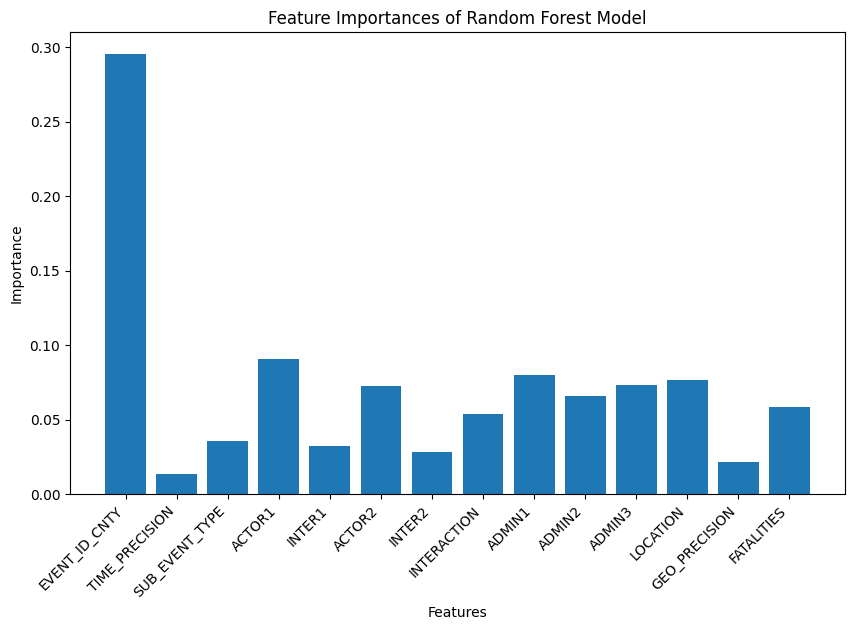

In [46]:
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Display the DataFrame with feature names and importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances of Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score


rf=RandomForestClassifier(n_estimators=200,random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86220339 0.8577725  0.85641634 0.86285811 0.85472114]
Mean CV Score: 0.8587942972236029


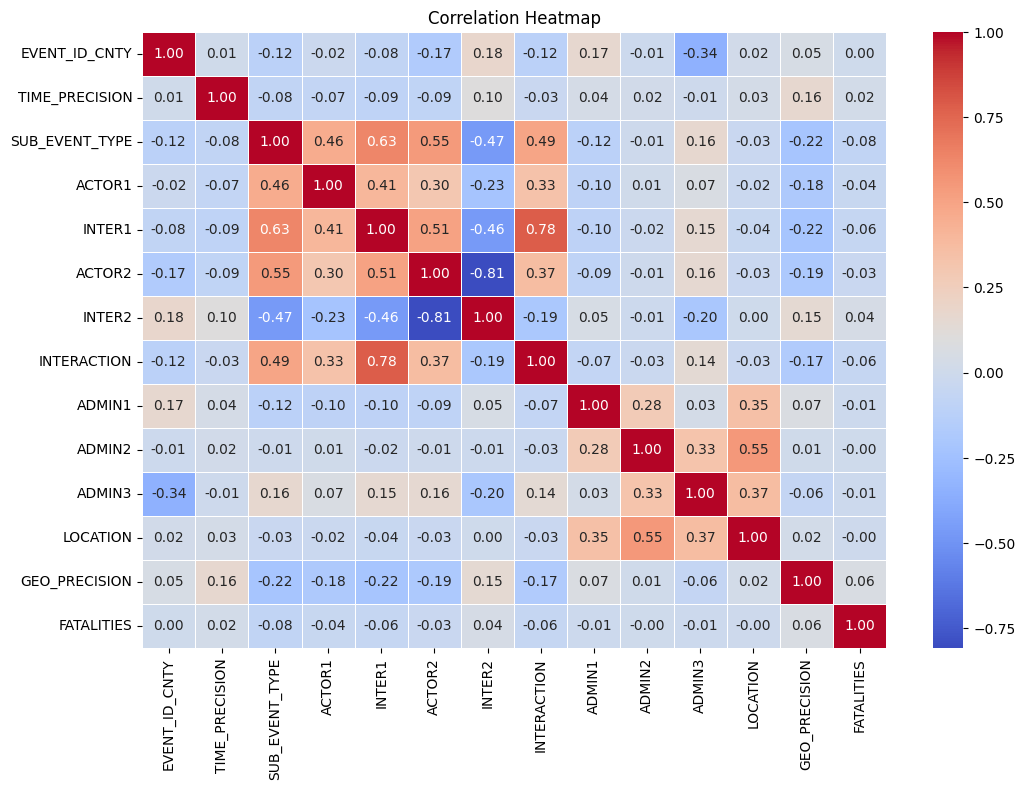

In [48]:
import seaborn as sns

correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

we can see that there is high negative correlation between  inter2 and actor2, so we would drop inter2 and train the model again. For same reasons, Interaction would also be dropped. Also, time precision and geo precision do not have much feature importance, so we would drop them as well

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EVENT_ID_CNTY   36871 non-null  int64
 1   TIME_PRECISION  36871 non-null  int64
 2   SUB_EVENT_TYPE  36871 non-null  int64
 3   ACTOR1          36871 non-null  int64
 4   INTER1          36871 non-null  int64
 5   INTERACTION     36871 non-null  int64
 6   ADMIN1          36871 non-null  int64
 7   ADMIN2          36871 non-null  int64
 8   ADMIN3          36871 non-null  int64
 9   LOCATION        36871 non-null  int64
 10  GEO_PRECISION   36871 non-null  int64
 11  FATALITIES      36871 non-null  int64
dtypes: int64(12)
memory usage: 4.7 MB


In [76]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EVENT_ID_CNTY   36871 non-null  int64
 1   TIME_PRECISION  36871 non-null  int64
 2   SUB_EVENT_TYPE  36871 non-null  int64
 3   ACTOR1          36871 non-null  int64
 4   INTER1          36871 non-null  int64
 5   ACTOR2          36871 non-null  int64
 6   INTER2          36871 non-null  int64
 7   INTERACTION     36871 non-null  int64
 8   ADMIN1          36871 non-null  int64
 9   ADMIN2          36871 non-null  int64
 10  ADMIN3          36871 non-null  int64
 11  LOCATION        36871 non-null  int64
 12  GEO_PRECISION   36871 non-null  int64
 13  SOURCE_SCALE    36871 non-null  int64
 14  FATALITIES      36871 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


In [87]:
X=final.drop(final.columns[[1,5,7,12,13]], axis=1)
y=final["SOURCE_SCALE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EVENT_ID_CNTY   36871 non-null  int64
 1   SUB_EVENT_TYPE  36871 non-null  int64
 2   ACTOR1          36871 non-null  int64
 3   INTER1          36871 non-null  int64
 4   INTER2          36871 non-null  int64
 5   ADMIN1          36871 non-null  int64
 6   ADMIN2          36871 non-null  int64
 7   ADMIN3          36871 non-null  int64
 8   LOCATION        36871 non-null  int64
 9   FATALITIES      36871 non-null  int64
dtypes: int64(10)
memory usage: 4.1 MB


In [89]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
accuracy_score(y_test,y_pred_lr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6657627118644068

In [97]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.62      0.15      0.24      2619
           1       0.67      0.95      0.79      4756

    accuracy                           0.67      7375
   macro avg       0.65      0.55      0.51      7375
weighted avg       0.65      0.67      0.59      7375



In [90]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred_gnb1=gnb1.predict(X_test)
accuracy_score(y_test,y_pred_gnb1)

0.6534237288135594

In [98]:
print(classification_report(y_test, y_pred_gnb1))

              precision    recall  f1-score   support

           0       0.52      0.25      0.34      2619
           1       0.68      0.87      0.76      4756

    accuracy                           0.65      7375
   macro avg       0.60      0.56      0.55      7375
weighted avg       0.62      0.65      0.61      7375



In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred_knn1=knn1.predict(X_test)
accuracy_score(y_test,y_pred_knn1)

0.8147796610169491

In [99]:
print(classification_report(y_test, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      2619
           1       0.85      0.87      0.86      4756

    accuracy                           0.81      7375
   macro avg       0.80      0.79      0.80      7375
weighted avg       0.81      0.81      0.81      7375



In [92]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

y_pred_dt1=dt1.predict(X_test)
accuracy_score(y_test,y_pred_dt1)

0.839457627118644

In [100]:
print(classification_report(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2619
           1       0.88      0.87      0.87      4756

    accuracy                           0.84      7375
   macro avg       0.82      0.83      0.83      7375
weighted avg       0.84      0.84      0.84      7375



In [96]:
from sklearn.model_selection import cross_val_score


rf=RandomForestClassifier(n_estimators=200,random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86338983 0.85539922 0.86031531 0.86455331 0.85302594]
Mean CV Score: 0.8593367218230037


In [93]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8619661016949153

In [94]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2619
           1       0.89      0.90      0.89      4756

    accuracy                           0.86      7375
   macro avg       0.85      0.85      0.85      7375
weighted avg       0.86      0.86      0.86      7375



          Feature  Importance
0   EVENT_ID_CNTY    0.357224
1  SUB_EVENT_TYPE    0.046179
2          ACTOR1    0.107374
3          INTER1    0.053937
4          INTER2    0.057462
5          ADMIN1    0.086133
6          ADMIN2    0.066758
7          ADMIN3    0.076564
8        LOCATION    0.082348
9      FATALITIES    0.066020


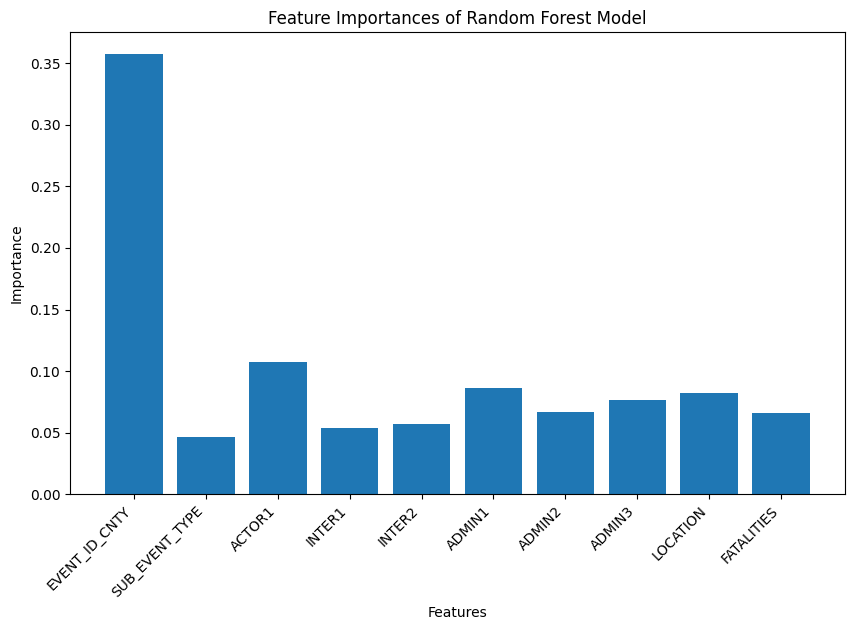

In [95]:
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Display the DataFrame with feature names and importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances of Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()